In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas and Numpy have been used for Data Manipulation and numerical Calculations
# Matplotlib and Seaborn have been used for Data visualizations

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Importing Dataset required

In [ ]:
df = pd.read_csv("/content/mpg.csv",  na_values='?')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# Understanding Data

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Data Types of the Data

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

All are numerical values except "name"

In [ ]:
df.shape

(398, 9)

## Checking for Duplicates

In [ ]:
duplicated_rows = df[df.duplicated()]

In [ ]:
duplicated_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


There is no duplicate values.

## Checking for missing values

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are 6 missing values in horsepower (6 out of 398 rows is a very very less count - we can choose to remove the rows or apply any imputation techniques)

### Applying various Imputation techniques

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Define the imputation strategies
imputation_strategies = ['mean', 'median', 'constant', 'most_frequent', 'ffill', 'bfill', 'linear', 'knn', 'regression']

# Loop through each strategy
for strategy in imputation_strategies:
    # Create a new DataFrame with the 'horsepower' column
    df_hp = df[['horsepower']].copy()

    # Apply the imputation strategy
    if strategy == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif strategy == 'median':
        imputer = SimpleImputer(strategy='median')
    elif strategy == 'constant':
        imputer = SimpleImputer(strategy='constant', fill_value=0)
    elif strategy == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
    elif strategy == 'ffill':
        df_hp.fillna(method='ffill', inplace=True)
    elif strategy == 'bfill':
        df_hp.fillna(method='bfill', inplace=True)
    elif strategy == 'linear':
        df_hp.interpolate(method='linear', inplace=True)

    # Print the DataFrame with imputed values
    print(f'Imputation strategy: {strategy}')
    print(df_hp.head())
    print()


Imputation strategy: mean
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: median
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: constant
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: most_frequent
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: ffill
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: bfill
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: linear
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: knn
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: regression
   horsepower
0       130.0
1       165.0
2       150.0
3     

### Dropping missing rows

In [ ]:
df = df.dropna(axis=0) ##removing rows - therefore axis=0

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are no missing values here

## Inferencing from Data

In [ ]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

The unique values are lesser in <strong>cylinders</strong> and <strong>origin</strong> columns. Therefore they can be considered as categorical values

## Dropping unwanted columns

In [ ]:
df.drop(columns=['name'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


## Finding correlation between features

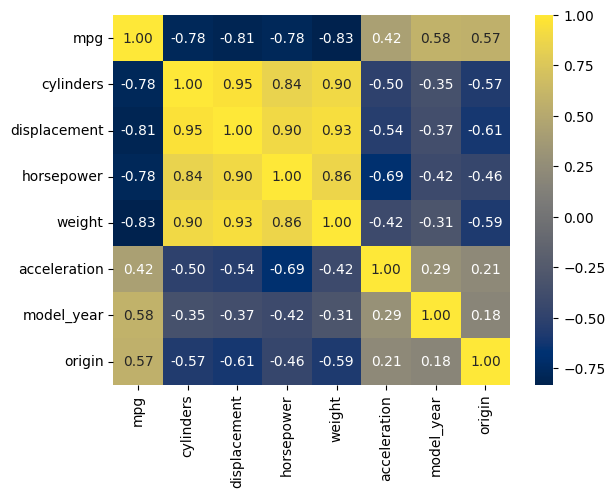

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')

# Show the plot
plt.show()

In [ ]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Here we have to find predict the MPG given other features. We can see that MPG depends the most to least on
1. model_year
2. origin
3. acceleration
4. cylinders
5. horsepower
6. displacement
7. weight

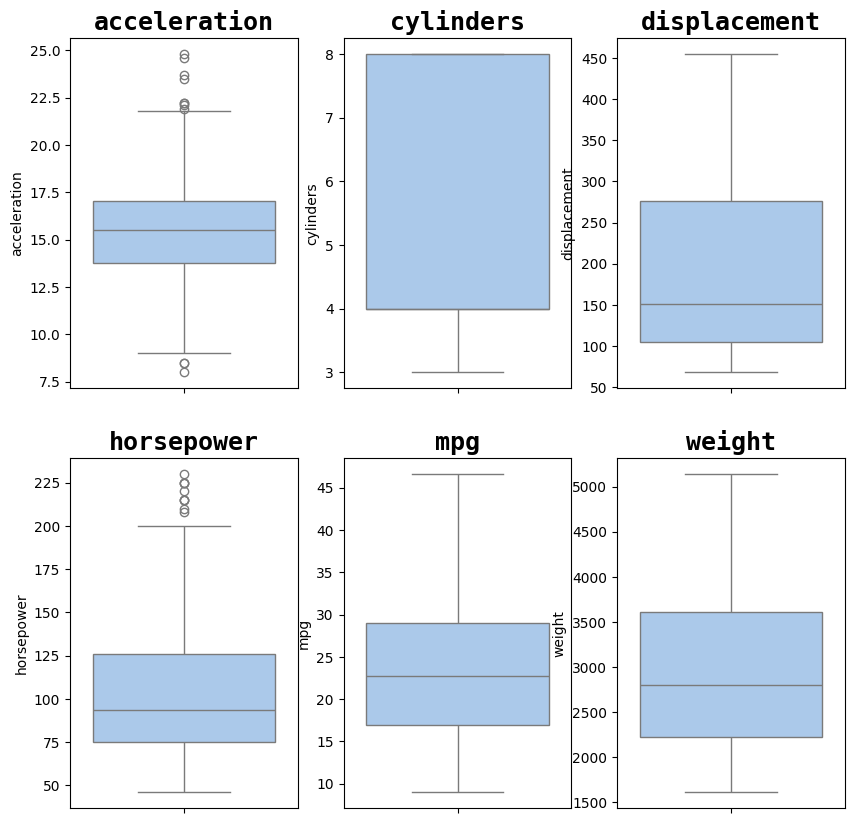

In [ ]:
num_cols = ['acceleration', 'cylinders', 'displacement', 'horsepower','mpg', 'weight']
num_df = df[num_cols]
fig, ax = plt.subplots(2, 3, figsize = (10,10))

for i, col in enumerate(num_df.columns):
    g = sns.boxplot(data = df, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

In [ ]:
# let's see how many outliers are in every column
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#condition
filt = ((num_df < (lower_bound)) | (num_df > (upper_bound)))
filt.sum()

acceleration    11
cylinders        0
displacement     0
horsepower      10
mpg              0
weight           0
dtype: int64

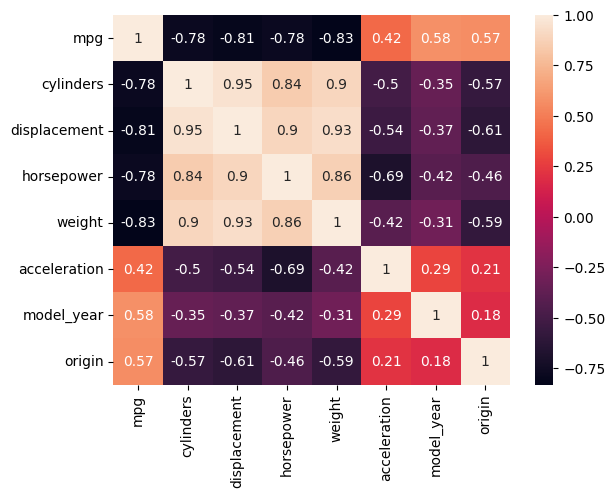

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

There are strong **Positive correlations between weight , horsepower, displacement, cylindrers.**
This makes sense, because for example the more cylinders the car have the more horsepower.

There are strong **Negative correlations between mpg and each of the following
weight, horsepower, displacement, cylindrers**
This is reasonable, because when the car is more powerful it requires more gallons.

# Data visualization

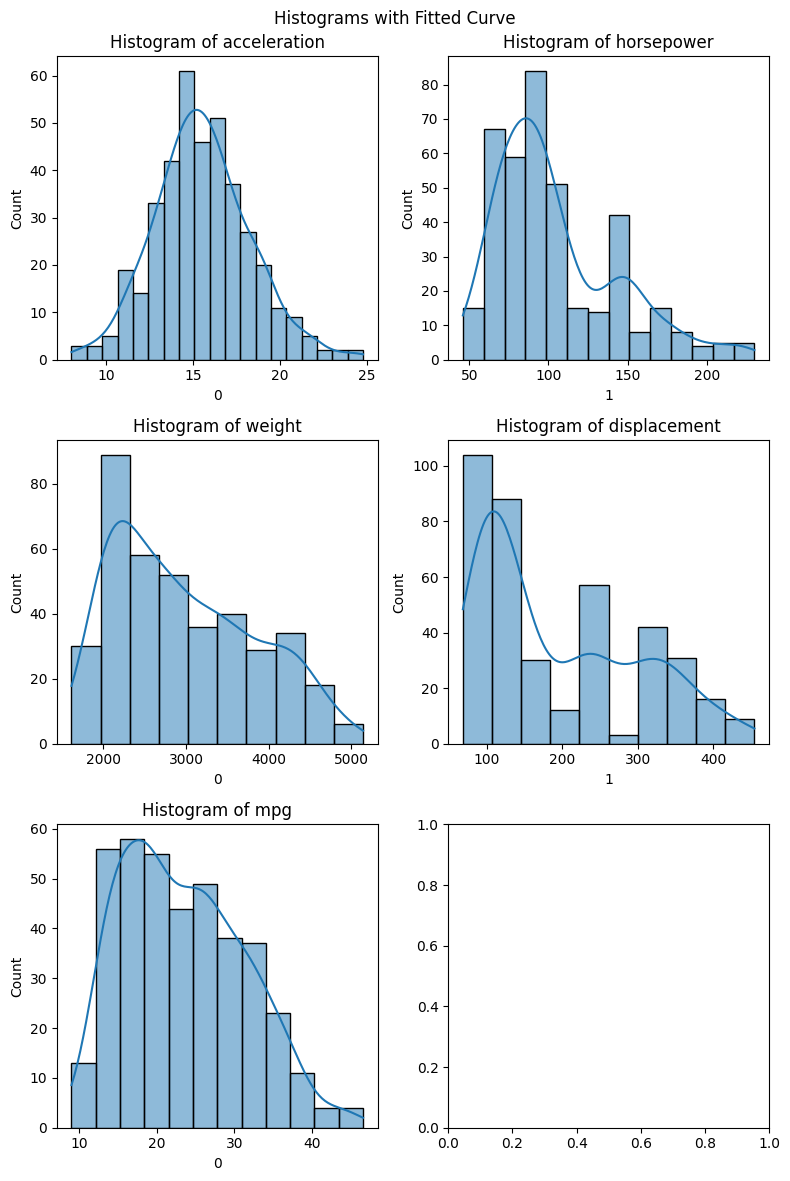

In [ ]:
columns_to_plot = ["acceleration", "horsepower", "weight", "displacement", 'mpg']

# Create subplots for each column
fig, axs = plt.subplots(3,2, figsize=(8, 12))
fig.suptitle('Histograms with Fitted Curve')

for i, col in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(df[columns_to_plot[i]], kde=True, ax=axs[row, col])
    axs[row, col].set_xlabel(col)
    axs[row, col].set_title(f'Histogram of {columns_to_plot[i]}')

plt.tight_layout()
plt.show()

**acceleration**:
The distribution is symmetric.
The most frequent value is about 15.

**horsepower**:
The distribution is right skewed. A small number of cars have high horsepower.
The |mose frequent value is about 85 but the distribution is bimodal. We can notice that there is a another mode at 150.

**weight**:
The distribution is right skewed. A small number of cars have high weight.
The most frequent value is about 2250.

**displacement**:
The distribution is right skewed. A small number of cars high displacment valus.
The most frequent value is about 100.

**mpg**:
The distribution is right skewed. which means that a small number of cars are efficient.
Most of cars have mpg about 12 - 27.

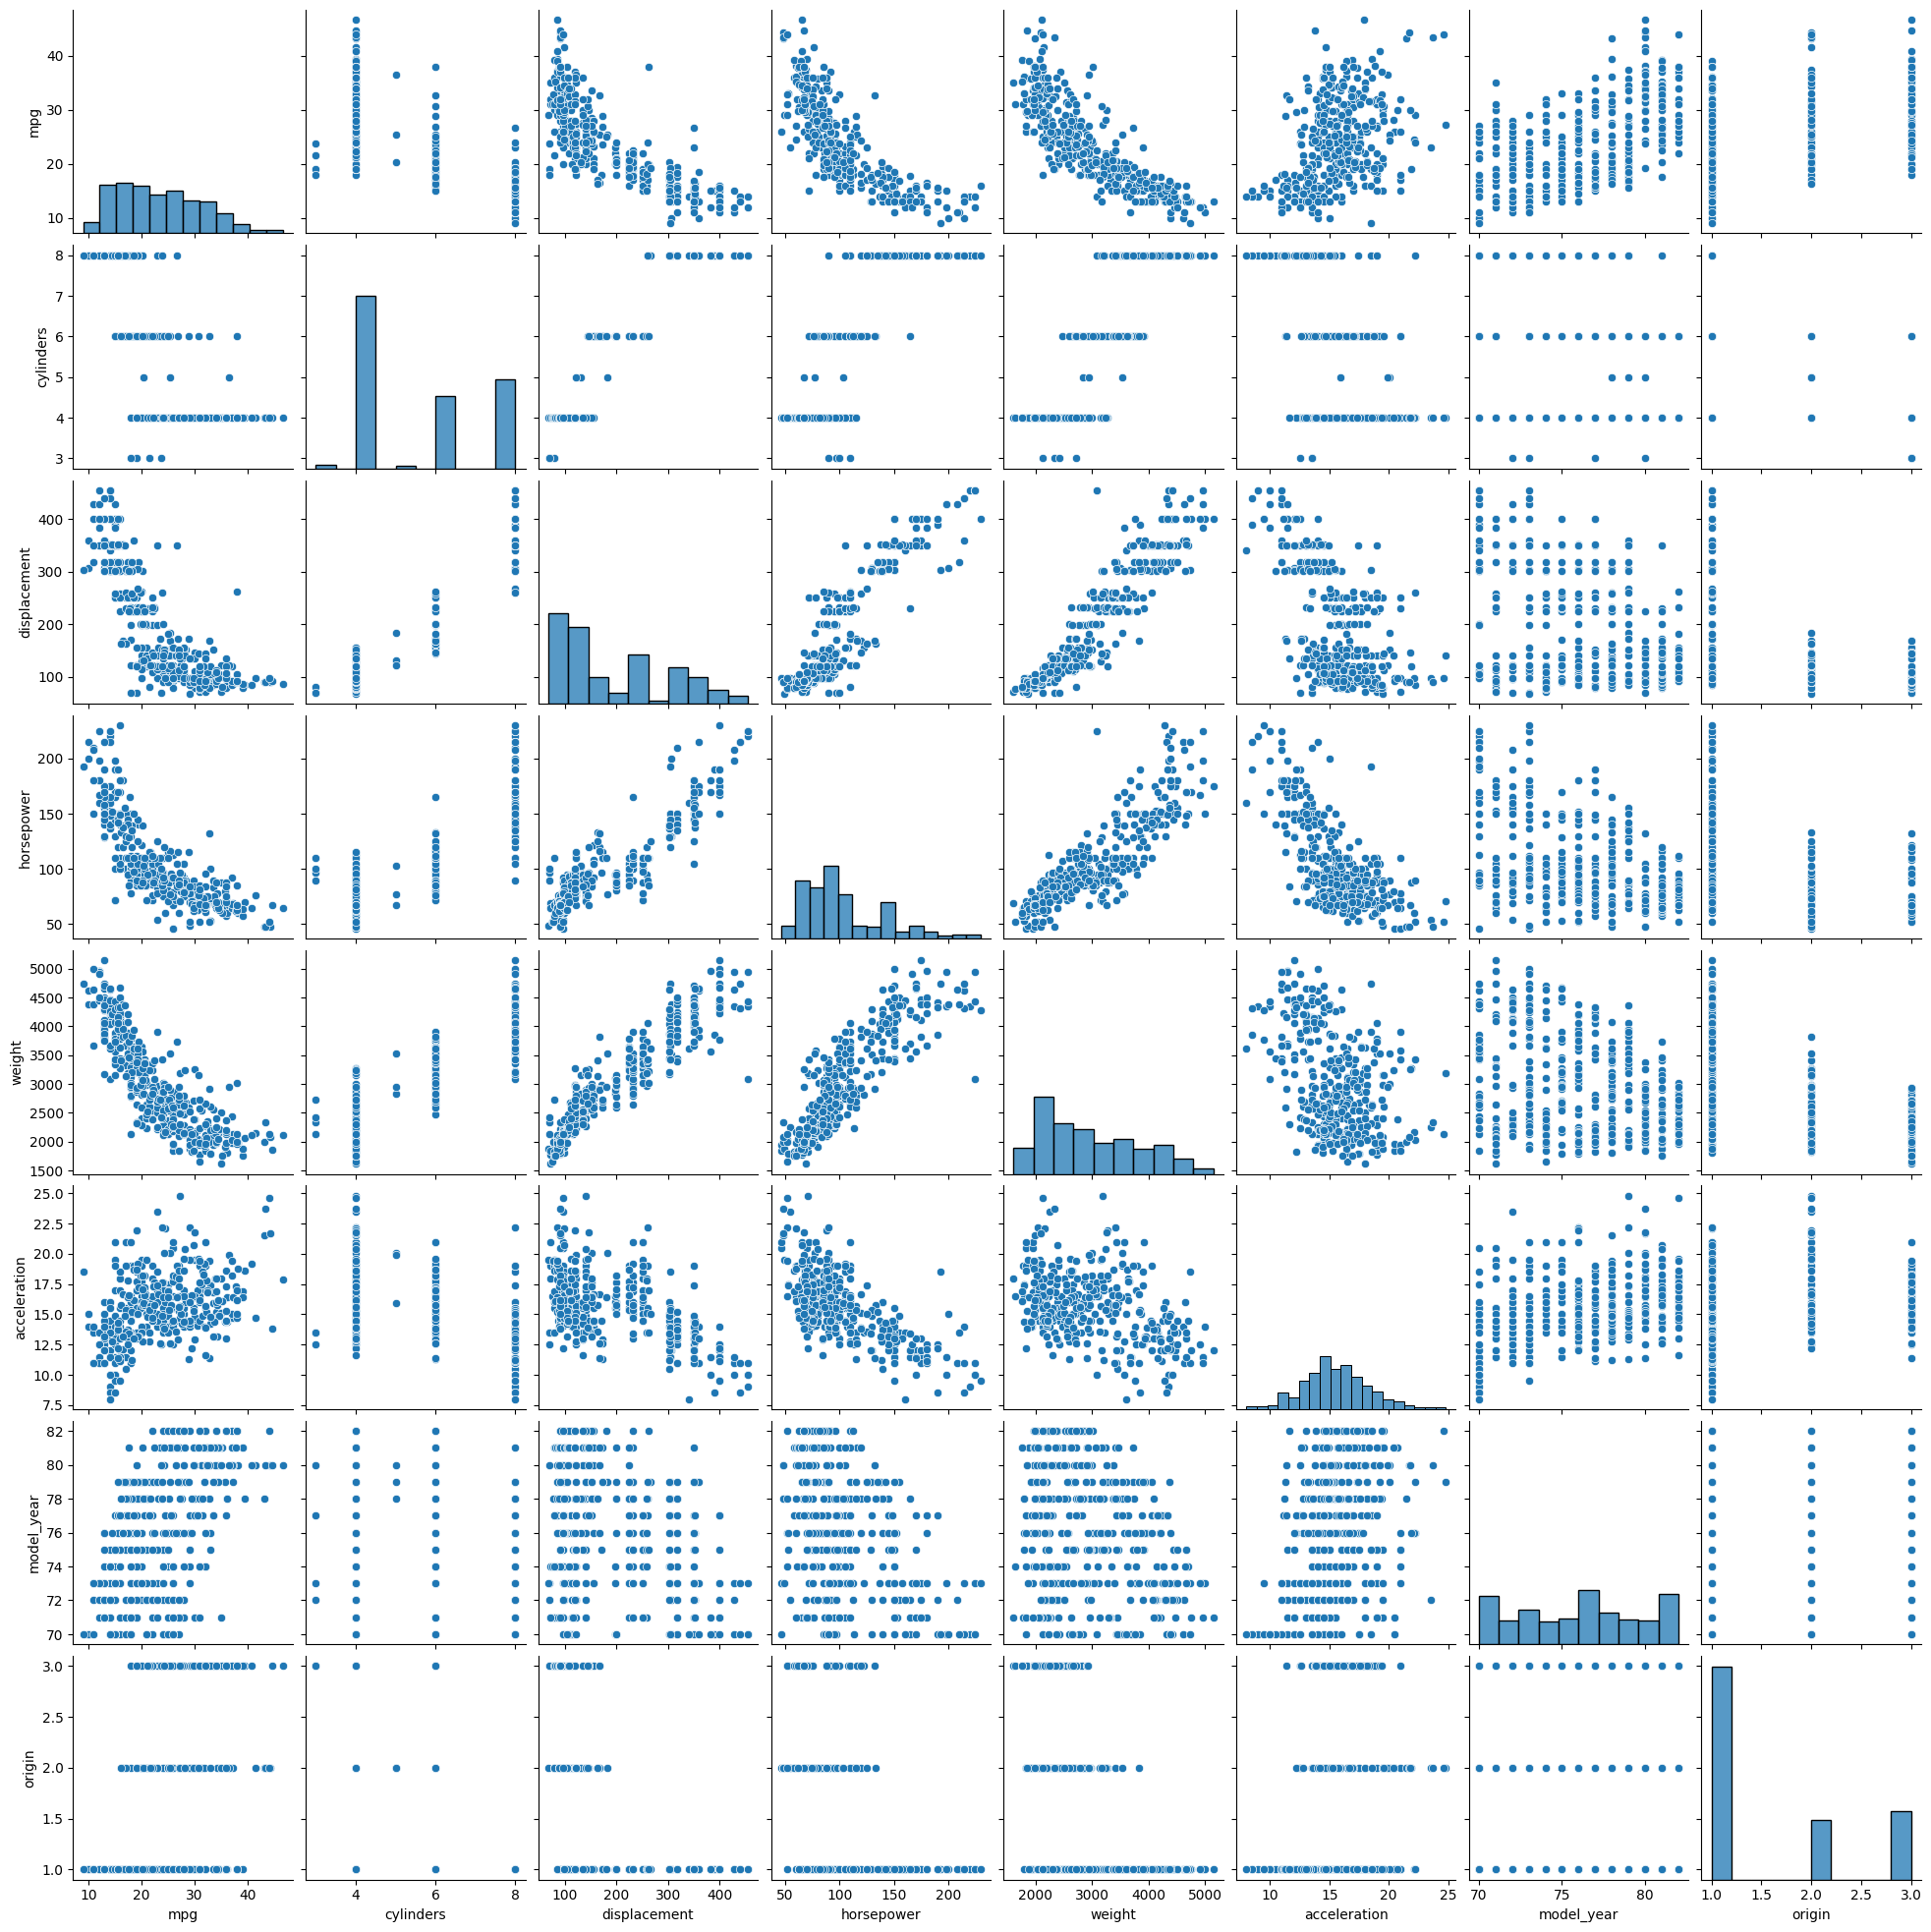

In [ ]:
sns.pairplot(df)

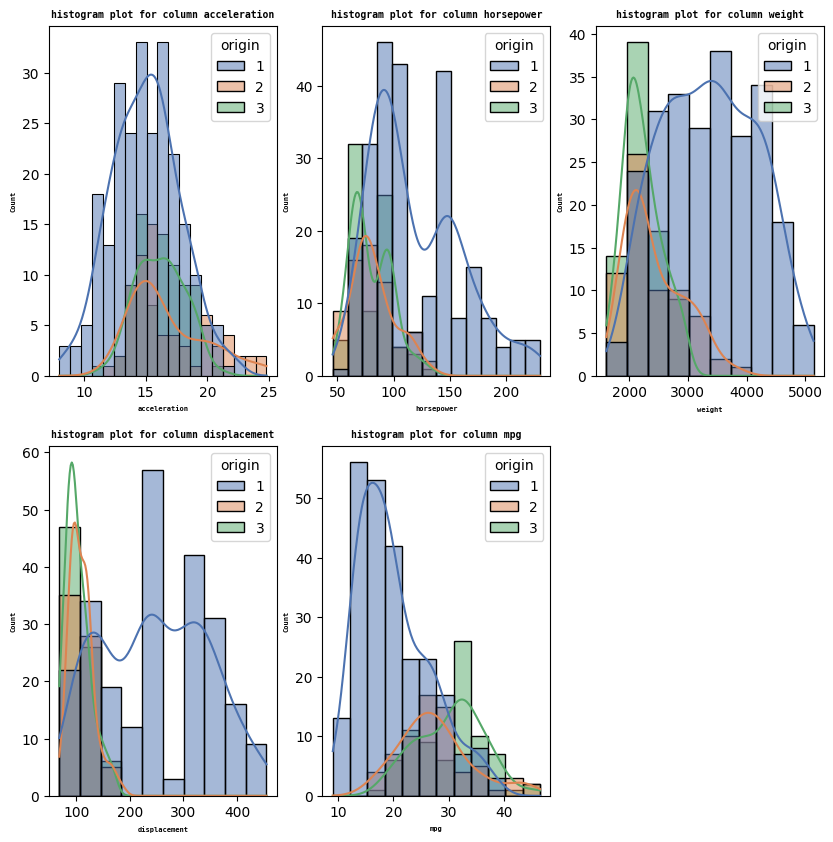

In [ ]:
def plot_hist(df, col, hue = None, ax = None):
    plot = sns.histplot(data = df, x = col, kde= True, hue = hue,palette='deep', ax = ax)
    # titles
    plot.set_title(f"histogram plot for column {col}", fontsize = 7,weight = "bold",
                fontname = "monospace")
    plot.set_xlabel(col, fontsize = 5,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 5,  weight = "semibold", fontname = "monospace")

num_cols = ["acceleration", "horsepower", "weight", "displacement", "mpg"]
fig, ax = plt.subplots(2,3, figsize = (10,10))
for i, col in enumerate(num_cols):
    plot_hist(df, col, ax = ax[i//3, i%3], hue = "origin")
ax[1, 2].remove()

It's clear the cars of origin 1 have lower mpg and higher displacement, horsepower, weight.
Origin 2 and origin 3 have similar distributions.
acceleration is the similiar for all values of origin.

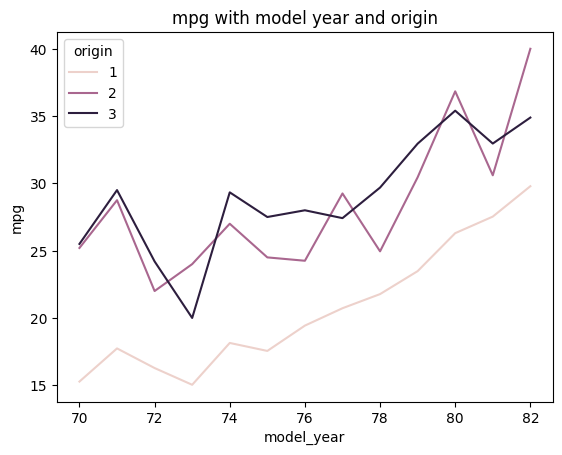

In [ ]:
plot = sns.lineplot(data = df, x = "model_year", y = "mpg", hue = "origin", ci = None)
# titles
plot.set_title("mpg with model year and origin")
plot.set_xlabel("model_year")
plot.set_ylabel("mpg")
plt.show()

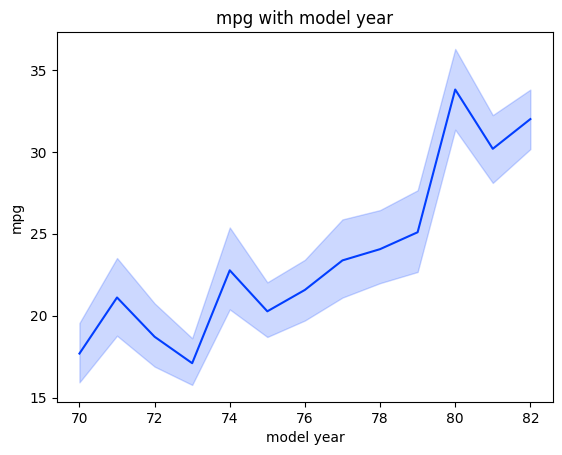

In [ ]:
plot = sns.lineplot(data = df, x = "model_year", y = "mpg")
# titles
plot.set_title("mpg with model year")
plot.set_xlabel("model year")
plot.set_ylabel("mpg")
plt.show()

It's clear that mpg increases. Except for year 1973 which noticed a fall in mpg value. The rate of increasing has itself increased in years 1979-1980. Then it had another fall in year 1981. and looks like it increased again in 1982. mpg is increasing for all origins. But you can see that mpg for cars of origin 1 are always less than origin 2 and 3.

## One Hot Encoding for dataset

In [ ]:
# Perform One-Hot Encoding for the 'origin' column
df_coded = pd.get_dummies(df, columns=['origin'])

# Print the first few rows of the DataFrame to verify the changes
print(df.head())
print(df_coded.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year 

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is already created and loaded

# Separate the features (X) and target variable (y)
X = df.drop(columns=["mpg"])
y = df["mpg"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# Concatenate the PCA components with the target variable
df_pca = pd.concat([df_pca, y], axis=1)

# Print the first few rows of the DataFrame to verify the changes
print(df_pca.head())


        PC1       PC2   mpg
0  2.643505  0.968121  18.0
1  3.378677  1.095924  15.0
2  2.992292  1.222173  18.0
3  2.821985  1.062283  16.0
4  2.869704  1.285961  17.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is already created and loaded

# Separate the features (X) and target variable (y)
X = df_coded.drop(columns=["mpg"])
y = df_coded["mpg"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# Concatenate the PCA components with the target variable
df_pca = pd.concat([df_pca, y], axis=1)

# Print the first few rows of the DataFrame to verify the changes
print(df_pca.head())


        PC1       PC2   mpg
0  2.721899  0.366428  18.0
1  3.412260  0.398098  15.0
2  3.045843  0.371134  18.0
3  2.887396  0.381552  16.0
4  2.929269  0.358933  17.0


# Feature Selection

## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Separate the features (X) and target variable (y)
X = df.drop(columns=["mpg"])
y = df["mpg"]

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=3)

# Fit RFE
rfe.fit(X, y)

# Print the selected features
print("Selected features:", X.columns[rfe.support_])


Selected features: Index(['cylinders', 'model_year', 'origin'], dtype='object')


##  SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize SelectKBest
skb = SelectKBest(score_func=f_regression, k=3)

# Fit SelectKBest
skb.fit(X, y)

# Print the selected features
print("Selected features:", X.columns[skb.get_support()])


Selected features: Index(['displacement', 'horsepower', 'weight'], dtype='object')


## L1 Regularization (LASSO)

In [ ]:
from sklearn.linear_model import LassoCV

# Initialize LASSO with cross-validation
lasso = LassoCV()

# Fit LASSO
lasso.fit(X, y)

# Print the selected features
print("Selected features:", X.columns[lasso.coef_ != 0])


Selected features: Index(['displacement', 'horsepower', 'weight', 'model_year'], dtype='object')


## Tree-based methods:




### Feature Importance from Random Forests



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Fit Random Forest Regressor
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display the feature importances
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort the feature importances in descending order
df_importances_sorted = df_importances.sort_values(by="Importance", ascending=False)

# Print the feature ranking
print("Feature ranking:")
print(df_importances_sorted)

Feature ranking:
        Feature  Importance
1  displacement    0.341273
3        weight    0.228764
0     cylinders    0.143635
2    horsepower    0.130729
5    model_year    0.119608
4  acceleration    0.029465
6        origin    0.006525


### Feature Importance from Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

# Fit DecisionTreeRegressor
dt.fit(X, y)

# Get feature importances
importances = dt.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display the feature importances
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort the feature importances in descending order
df_importances_sorted = df_importances.sort_values(by="Importance", ascending=False)

# Print the feature ranking
print("Feature ranking:")
print(df_importances_sorted)

Feature ranking:
        Feature  Importance
1  displacement    0.596557
2    horsepower    0.172561
5    model_year    0.110473
3        weight    0.077788
4  acceleration    0.032030
6        origin    0.007493
0     cylinders    0.003098


## Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)

# Fit VarianceThreshold
vt.fit(X)

# Get the selected features
selected_features = X.columns[vt.get_support()]

# Get the variances of the selected features
selected_variances = vt.variances_[vt.get_support()]

# Create a DataFrame to display the selected features and their variances
df_selected_features = pd.DataFrame({"Feature": selected_features, "Variance": selected_variances})

# Print the DataFrame
print(df_selected_features)


        Feature       Variance
0     cylinders       2.902274
1  displacement   10922.432943
2    horsepower    1477.789879
3        weight  719644.186791
4  acceleration       7.591915
5    model_year      13.535298
6        origin       0.647204


## Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X, y)

# Print the mutual information scores
print("Mutual information scores:", mi)


Mutual information scores: [0.63658778 0.76768811 0.72251769 0.77871544 0.18705389 0.38119514
 0.25637735]


## Sequential Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(LinearRegression(), k_features=3, forward=True, scoring='r2', cv=5)

# Fit Sequential Feature Selector
sfs.fit(X, y)

# Print the selected features
print("Selected features:", X.columns[list(sfs.k_feature_idx_)])


Selected features: Index(['weight', 'model_year', 'origin'], dtype='object')
